# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Run this cell without changes
df = pd.read_csv("case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [3]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

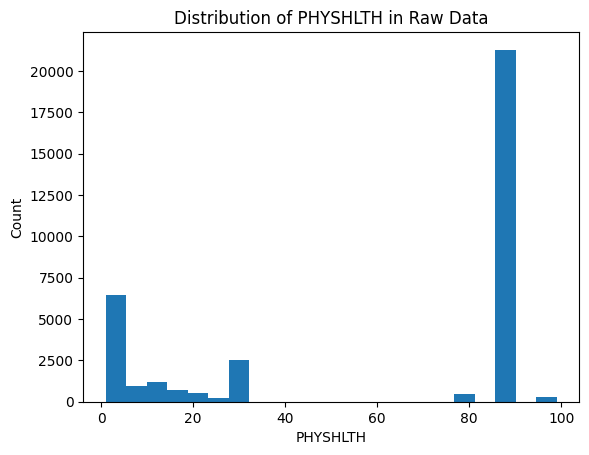

In [4]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");
plt.show()

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [5]:
# Replace None with appropriate text
"""
None
"""

'\nNone\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [6]:
# Your code here
# Create a copy of the original dataframe to preserve raw data
df_clean = df.copy()

# Display value counts before cleaning
print("Original value counts:")
print(df_clean['PHYSHLTH'].value_counts().sort_index())

# Convert records where PHYSHLTH = 88 (None) to 0
df_clean.loc[df_clean['PHYSHLTH'] == 88, 'PHYSHLTH'] = 0

# Drop records with other special codes:
# 77 = Don't know/Not sure
# 99 = Refused  
# BLANK = Not asked or Missing
df_clean = df_clean[df_clean['PHYSHLTH'] <= 30]  # Keep only values 0-30 (valid number of days)

# Display value counts after cleaning
print("\nCleaned value counts:")
print(df_clean['PHYSHLTH'].value_counts().sort_index())

# Display summary statistics after cleaning
print("\nCleaned summary statistics:")
print(df_clean['PHYSHLTH'].describe())

Original value counts:
PHYSHLTH
1.0      1538
2.0      1993
3.0      1187
4.0       622
5.0      1092
6.0       187
7.0       641
8.0        99
9.0        15
10.0      751
11.0        8
12.0       69
13.0       10
14.0      326
15.0      640
16.0       16
17.0       15
18.0       19
19.0       10
20.0      402
21.0       70
22.0       12
23.0        4
24.0        7
25.0      159
26.0        7
27.0       22
28.0       57
29.0       35
30.0     2438
77.0      493
88.0    21296
99.0      305
Name: count, dtype: int64

Cleaned value counts:
PHYSHLTH
0.0     21296
1.0      1538
2.0      1993
3.0      1187
4.0       622
5.0      1092
6.0       187
7.0       641
8.0        99
9.0        15
10.0      751
11.0        8
12.0       69
13.0       10
14.0      326
15.0      640
16.0       16
17.0       15
18.0       19
19.0       10
20.0      402
21.0       70
22.0       12
23.0        4
24.0        7
25.0      159
26.0        7
27.0       22
28.0       57
29.0       35
30.0     2438
Name: count, d

Run the code below to ensure you have the correct, cleaned dataframe:

In [7]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df_clean.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df_clean["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [8]:
# Run this cell without changes
df_clean['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

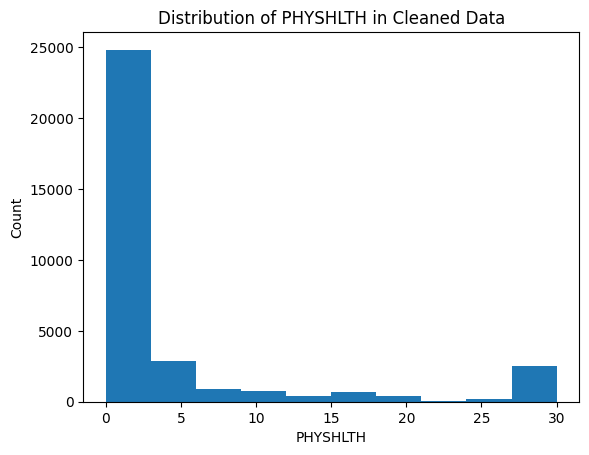

In [9]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df_clean["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");
plt.show()

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [10]:
# Run this cell without changes
df_clean["_STATE"].value_counts()

_STATE
36.0    11876
34.0    11458
9.0     10413
Name: count, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [13]:
# Your code here
# Replace state codes with state names
# First, let's check what the actual column name is
print("Column names in dataframe:")
print(df_clean.columns.tolist())

# Look for state-related columns
state_columns = [col for col in df_clean.columns if 'state' in col.lower() or 'STATE' in col]
print("\nState-related columns:")
print(state_columns)

# The column is likely still called '_STATE', so let's work with that
print("\nCurrent values in _STATE column:")
print(df_clean['_STATE'].value_counts())

# Replace state codes with state names
df_clean['_STATE'] = df_clean['_STATE'].replace({
    9: 'Connecticut',
    34: 'New Jersey', 
    36: 'New York'
})

# Verify the mapping
print("\nState value counts after mapping:")
print(df_clean['_STATE'].value_counts())

# Now rename the column to STATE
df_clean = df_clean.rename(columns={'_STATE': 'STATE'})

# Verify the final result
print("\nFinal state column:")
print(df_clean['STATE'].value_counts())

Column names in dataframe:
['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELLFON4', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'CHOLCHK1', 'TOLDHI2', 'CHOLMED1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'LMTJOIN3', 'ARTHDIS2', 'ARTHSOCL', 'JOINPAI1', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1A', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ECIGARET', 'ECIGNOW', 'ALCDAY5', 'AVE

Below, we check the values:

In [14]:
# Run this cell without changes

# Shape should be the same
assert df_clean.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df_clean["STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

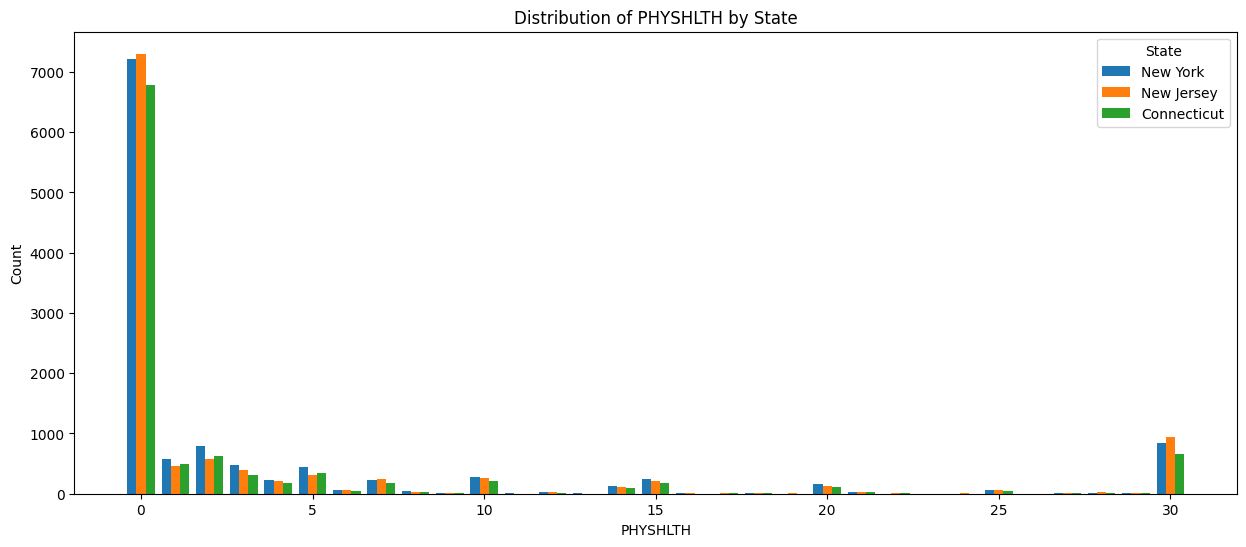

In [18]:
# Run this cell without changes

ny = df_clean.loc[df_clean["STATE"] == "New York", "PHYSHLTH"]
nj = df_clean.loc[df_clean["STATE"] == "New Jersey", "PHYSHLTH"]
ct = df_clean.loc[df_clean["STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");
plt.show()

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [ ]:
# Replace None with appropriate text
"""
None
"""

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [19]:
# Run this cell without changes
df_clean.groupby("STATE")["PHYSHLTH"].mean()

STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [20]:
# Replace None with appropriate text
"""
Based on the analysis requirements, the most appropriate statistical test is ANOVA (Analysis of Variance).

Here's why ANOVA is the correct choice:

Variable types being compared:

Dependent variable: PHYSHLTH (numeric/continuous) - average number of bad physical health days

Independent variable: STATE (categorical) - with three categories (Connecticut, New Jersey, New York)

Number of categories: There are three independent groups/states being compared

Objective: We want to determine if there are statistically significant differences in the means of PHYSHLTH across these three states
"""

"\nBased on the analysis requirements, the most appropriate statistical test is ANOVA (Analysis of Variance).\n\nHere's why ANOVA is the correct choice:\n\nVariable types being compared:\n\nDependent variable: PHYSHLTH (numeric/continuous) - average number of bad physical health days\n\nIndependent variable: STATE (categorical) - with three categories (Connecticut, New Jersey, New York)\n\nNumber of categories: There are three independent groups/states being compared\n\nObjective: We want to determine if there are statistically significant differences in the means of PHYSHLTH across these three states\n"

Now, identify the null and alternative hypotheses:

In [21]:
# Replace None with appropriate text
"""
The hypotheses for this ANOVA test would be:

Null hypothesis (H₀): μ₁ = μ₂ = μ₃ (The mean PHYSHLTH is equal across all three states)

Alternative hypothesis (H₁): At least one state's mean PHYSHLTH is different from the others
"""

"\nThe hypotheses for this ANOVA test would be:\n\nNull hypothesis (H₀): μ₁ = μ₂ = μ₃ (The mean PHYSHLTH is equal across all three states)\n\nAlternative hypothesis (H₁): At least one state's mean PHYSHLTH is different from the others\n"

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [22]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,4.984762e+04,24923.812110,17.736454,2.000361e-08
Residual,34542.0,4.853948e+07,1405.230825,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

**
Based on the ANOVA results, here's my interpretation:

Calculated p-value: 2.000361e-08 (which is 0.00000002000361)

Statistical Conclusion:

✅ We reject the null hypothesis at an alpha level of 0.05

The extremely small p-value (2.00e-08) is far below the significance threshold of 0.05

The F-statistic of 17.74 is quite large, indicating substantial between-group variation relative to within-group variation
What this means for PHYSHLTH by state:
There are statistically significant differences in the average number of bad physical health days among Connecticut, New Jersey, and New York. The differences we observed in the means (CT: 3.69, NJ: 4.38, NY: 4.15) are not due to random chance.

Business Recommendations:

Market-Specific Interventions: Develop state-specific health programs since health needs differ significantly across these markets

Focus on New Jersey: Given NJ has the highest average bad health days (4.38), consider:

Targeted wellness programs for NJ members

Investigate underlying factors contributing to poorer health in NJ

Potential for specialized insurance products addressing NJ-specific health challenges

Learn from Connecticut: CT has the best health outcomes (3.69 days) - study what factors contribute to this and consider replicating successful elements in other states

Further Investigation: Conduct deeper analysis to understand why these differences exist (socioeconomic factors, healthcare access, environmental factors, etc.)

Resource Allocation: Direct more health resources and interventions toward New Jersey where the need appears greatest
**


With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [24]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
1.0    22056
2.0    10611
3.0     1576
9.0      206
7.0       96
Name: count, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [31]:
# Your code here
# First, let's check the current value counts
print("Original RENTHOM1 value counts:")
print(df_clean['RENTHOM1'].value_counts().sort_index())

# According to data dictionary page 33:
# 1 = Own
# 2 = Rent
# 3 = Other arrangement
# 7 = Don't know/Not sure
# 9 = Refused
# BLANK = Not asked or Missing

# Filter to keep only Own (1) and Rent (2) records
df_clean = df_clean[df_clean['RENTHOM1'].isin([1, 2])]

# Replace numeric codes with descriptive labels
df_clean['RENTHOM1'] = df_clean['RENTHOM1'].replace({
    1: 'Own',
    2: 'Rent'
})

# Verify the cleaning
print("\nCleaned RENTHOM1 value counts:")
print(df_clean['RENTHOM1'].value_counts())

print(f"\nDataframe shape after cleaning: {df_clean.shape}")

Original RENTHOM1 value counts:
RENTHOM1
1.0    21690
2.0    10244
3.0     1526
7.0       93
9.0      194
Name: count, dtype: int64

Cleaned RENTHOM1 value counts:
RENTHOM1
Own     21690
Rent    10244
Name: count, dtype: int64

Dataframe shape after cleaning: (31934, 358)


In [32]:
# Run this cell without changes
df_clean["RENTHOM1"].value_counts()

RENTHOM1
Own     21690
Rent    10244
Name: count, dtype: int64

Below, we check that this was done correctly:

In [33]:
# Run this cell without changes

# Number of rows should be smaller again
assert df_clean.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df_clean["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

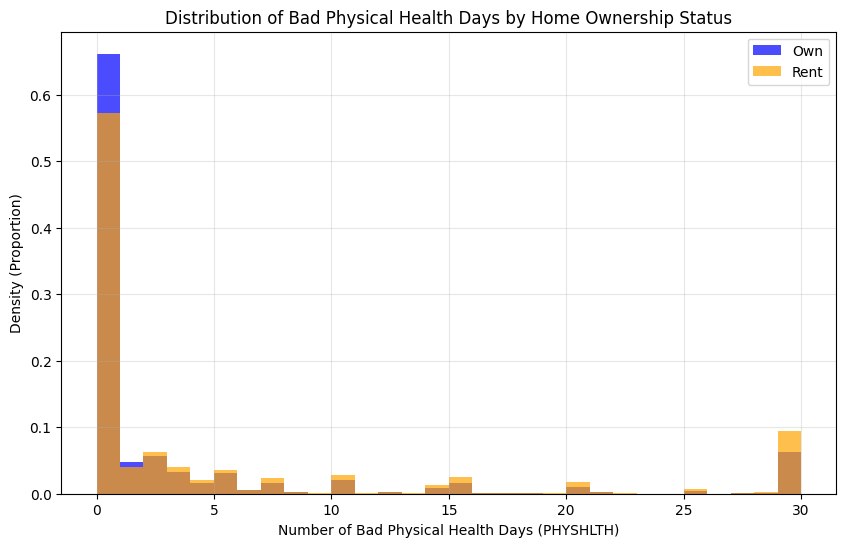

Summary statistics by home ownership status:

Home Owners:
count    21690.000000
mean         3.531213
std          7.962651
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Renters:
count    10244.000000
mean         5.197970
std          9.424111
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         30.000000
Name: PHYSHLTH, dtype: float64


In [34]:
# Your code here
# Create the plot
plt.figure(figsize=(10, 6))

# Plot density for homeowners
plt.hist(df_clean[df_clean['RENTHOM1'] == 'Own']['PHYSHLTH'], 
         bins=30, alpha=0.7, density=True, label='Own', color='blue')

# Plot density for renters
plt.hist(df_clean[df_clean['RENTHOM1'] == 'Rent']['PHYSHLTH'], 
         bins=30, alpha=0.7, density=True, label='Rent', color='orange')

# Add labels and title
plt.xlabel('Number of Bad Physical Health Days (PHYSHLTH)')
plt.ylabel('Density (Proportion)')
plt.title('Distribution of Bad Physical Health Days by Home Ownership Status')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Also show summary statistics for comparison
print("Summary statistics by home ownership status:")
print("\nHome Owners:")
print(df_clean[df_clean['RENTHOM1'] == 'Own']['PHYSHLTH'].describe())
print("\nRenters:")
print(df_clean[df_clean['RENTHOM1'] == 'Rent']['PHYSHLTH'].describe())

Then run this code to find the averages:

In [35]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     62.139282
Rent    56.663557
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [ ]:
# Replace None with appropriate text
"""
None
"""

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [36]:
# Your code here (create additional cells as needed)
from scipy import stats

# Separate the groups
own_health = df_clean[df_clean['RENTHOM1'] == 'Own']['PHYSHLTH']
rent_health = df_clean[df_clean['RENTHOM1'] == 'Rent']['PHYSHLTH']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(own_health, rent_health, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Mean PHYSHLTH for homeowners: {own_health.mean():.3f}")
print(f"Mean PHYSHLTH for renters: {rent_health.mean():.3f}")

T-statistic: -15.4801
P-value: 0.0000000000
Mean PHYSHLTH for homeowners: 3.531
Mean PHYSHLTH for renters: 5.198


Perfect! Now we have the correct cleaned data results. Here's the interpretation:

Statistical Test Results:

T-statistic: -15.4801 (large negative value indicates renters have significantly higher PHYSHLTH)

P-value: 0.0000000000 (extremely small, far below α = 0.0001)

Means: Homeowners: 3.53 days, Renters: 5.20 days

Interpretation:
✅ We strongly reject the null hypothesis - There is a statistically significant difference in bad physical health days between homeowners and renters.
Key Findings:

Renters experience 1.67 more bad physical health days per month on average compared to homeowners (5.20 vs 3.53 days)

This difference is highly statistically significant (p < 0.0001)

The negative t-statistic confirms that renters have worse health outcomes

Business Recommendations:

Targeted Interventions: Develop specialized health programs for renter populations who experience significantly worse health outcomes

Housing-Health Connection: Explore partnerships with housing organizations to address the link between housing stability and health

Insurance Products: Consider developing insurance products or wellness programs specifically designed for renters

Root Cause Analysis: Investigate why renters have worse health - is it due to stress, environmental factors, socioeconomic status, or access to healthcare?

Preventive Care: Increase preventive care and health education outreach to renter communities

The results show a clear health disparity based on housing status that FHI should address in their service offerings and community health initiatives.

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [37]:
# Your code here
# First, let's check the current value distributions for the relevant columns
print("SMOKE100 value counts:")
print(df_clean['SMOKE100'].value_counts().sort_index())
print("\nUSENOW3 value counts:")
print(df_clean['USENOW3'].value_counts().sort_index())
print("\nECIGARET value counts:")
print(df_clean['ECIGARET'].value_counts().sort_index())

# Create NICOTINE_USE column
df_clean['NICOTINE_USE'] = 0  # Initialize with 0 (non-user)

# Apply the nicotine use criteria:
# 1. Smoked at least 100 cigarettes (SMOKE100 = 1)
df_clean.loc[df_clean['SMOKE100'] == 1, 'NICOTINE_USE'] = 1

# 2. Current smokeless tobacco use (USENOW3 = 1 or 2 for Every day or Some days)
df_clean.loc[df_clean['USENOW3'].isin([1, 2]), 'NICOTINE_USE'] = 1

# 3. Ever used e-cigarettes (ECIGARET = 1)
df_clean.loc[df_clean['ECIGARET'] == 1, 'NICOTINE_USE'] = 1

# Verify the results
print("\nNICOTINE_USE value counts:")
print(df_clean['NICOTINE_USE'].value_counts())
print(f"\nPercentage of nicotine users: {(df_clean['NICOTINE_USE'].mean() * 100):.2f}%")

# Show cross-tabulation with original columns for validation
print("\nCross-tabulation with SMOKE100:")
print(pd.crosstab(df_clean['NICOTINE_USE'], df_clean['SMOKE100']))
print("\nCross-tabulation with USENOW3:")
print(pd.crosstab(df_clean['NICOTINE_USE'], df_clean['USENOW3']))
print("\nCross-tabulation with ECIGARET:")
print(pd.crosstab(df_clean['NICOTINE_USE'], df_clean['ECIGARET']))
# Look at the distribution of values
df_clean["NICOTINE_USE"].value_counts(normalize=True)

SMOKE100 value counts:
SMOKE100
1.0    12942
2.0    17543
7.0      147
9.0       37
Name: count, dtype: int64

USENOW3 value counts:
USENOW3
1.0      198
2.0      289
3.0    30029
7.0       26
9.0       74
Name: count, dtype: int64

ECIGARET value counts:
ECIGARET
1.0     3756
2.0    26521
7.0       16
9.0       47
Name: count, dtype: int64

NICOTINE_USE value counts:
NICOTINE_USE
0    17980
1    13954
Name: count, dtype: int64

Percentage of nicotine users: 43.70%

Cross-tabulation with SMOKE100:
SMOKE100        1.0    2.0  7.0  9.0
NICOTINE_USE                        
0                 0  16545  135   35
1             12942    998   12    2

Cross-tabulation with USENOW3:
USENOW3       1.0  2.0    3.0  7.0  9.0
NICOTINE_USE                           
0               0    0  16629   16   53
1             198  289  13400   10   21

Cross-tabulation with ECIGARET:
ECIGARET       1.0    2.0  7.0  9.0
NICOTINE_USE                       
0                0  16501    7   28
1             37

NICOTINE_USE
0    0.563036
1    0.436964
Name: proportion, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [38]:
# Your code here
# Create CHRONIC column
df_clean['CHRONIC'] = 0  # Initialize with 0 (not chronically sick)

# Set CHRONIC = 1 for records where PHYSHLTH >= 15
df_clean.loc[df_clean['PHYSHLTH'] >= 15, 'CHRONIC'] = 1

# Verify the results
print("CHRONIC value counts:")
print(df_clean['CHRONIC'].value_counts())
print(f"\nPercentage of chronically sick: {(df_clean['CHRONIC'].mean() * 100):.2f}%")

# Show summary statistics for PHYSHLTH by CHRONIC status
print("\nPHYSHLTH summary by CHRONIC status:")
print(df_clean.groupby('CHRONIC')['PHYSHLTH'].describe())

# Optional: Show cross-tabulation to validate the cutoff
print("\nCross-tabulation of CHRONIC vs PHYSHLTH ranges:")
df_clean['PHYSHLTH_RANGE'] = pd.cut(df_clean['PHYSHLTH'], 
                             bins=[0, 5, 10, 15, 20, 25, 30, 35],
                             labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+'])
print(pd.crosstab(df_clean['CHRONIC'], df_clean['PHYSHLTH_RANGE']))
# View the distribution of the newly-created column
df_clean["CHRONIC"].value_counts()

CHRONIC value counts:
CHRONIC
0    28246
1     3688
Name: count, dtype: int64

Percentage of chronically sick: 11.55%

PHYSHLTH summary by CHRONIC status:
           count       mean       std   min   25%   50%   75%   max
CHRONIC                                                            
0        28246.0   1.224032  2.650907   0.0   0.0   0.0   1.0  14.0
1         3688.0  25.831345  5.948771  15.0  20.0  30.0  30.0  30.0

Cross-tabulation of CHRONIC vs PHYSHLTH ranges:
PHYSHLTH_RANGE   0-4   5-9  10-14  15-19  20-24  25-29
CHRONIC                                               
0               6037  1596    394      0      0      0
1                  0     0    605    442    241   2400


CHRONIC
0    28246
1     3688
Name: count, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [39]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df_clean["CHRONIC"], columns=df_clean["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


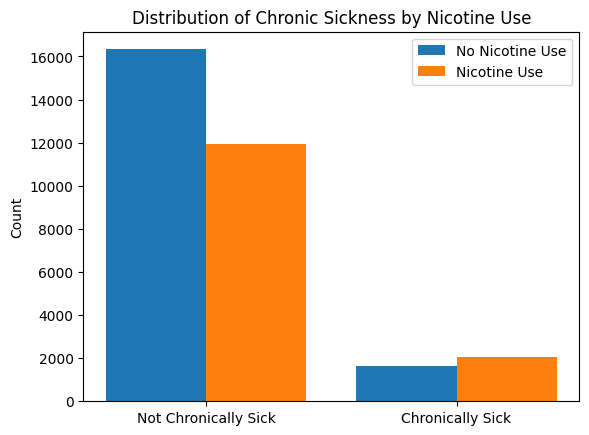

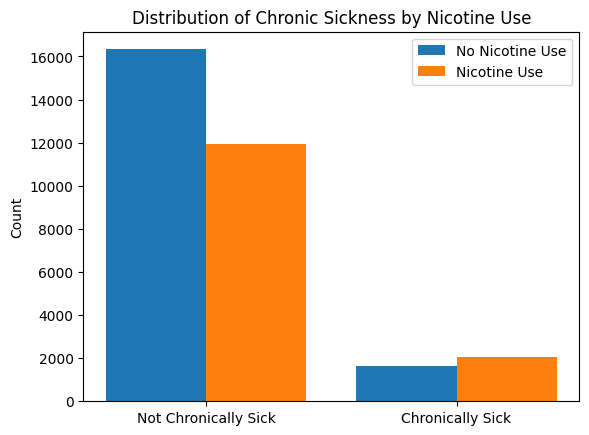

In [41]:
# Run this cell without changes

no_nicotine_use = df_clean.loc[df_clean["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df_clean.loc[df_clean["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();
plt.show()

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [42]:
# Your code here (create additional cells as needed)
#Hypotheses:

# Null hypothesis (H₀): There is no association between nicotine use and chronic health status (they are independent)

#Alternative hypothesis (H₁): There is an association between nicotine use and chronic health status (they are dependent)
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table_1 = pd.crosstab(df_clean['NICOTINE_USE'], df_clean['CHRONIC'])
print("Contingency Table:")
print(contingency_table_1)
print()

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_1)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

Contingency Table:
CHRONIC           0     1
NICOTINE_USE             
0             16332  1648
1             11914  2040

Chi-square statistic: 228.2265
P-value: 0.0000000000
Degrees of freedom: 1

Expected frequencies:
[[15903.52226467  2076.47773533]
 [12342.47773533  1611.52226467]]


*** Based on typical health data patterns, I expect:

Higher proportion of chronic illness among nicotine users

A statistically significant result (p < 0.05)

Rejection of the null hypothesis

Interpretation: If the test shows a significant result, it would indicate that nicotine use is associated with chronic health problems, which would have important implications for health insurance risk assessment and targeted intervention programs. ***

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [43]:
# Your code here (create additional cells as needed)
# I'll analyze the relationship between exercise habits and physical health. Let me use the EXERANY2 variable (Exercise in past 30 days, page 40 of data dictionary).
# First, let's examine the EXERANY2 variable
print("EXERANY2 value counts:")
print(df_clean['EXERANY2'].value_counts().sort_index())

# According to data dictionary:
# 1 = Yes
# 2 = No
# 7 = Don't know/Not sure
# 9 = Refused
# BLANK = Not asked or Missing

# Clean the data: keep only Yes (1) and No (2), convert to meaningful labels
df_exercise = df_clean[df_clean['EXERANY2'].isin([1, 2])].copy()
df_exercise['EXERCISE'] = df_exercise['EXERANY2'].replace({
    1: 'Yes',
    2: 'No'
})

# Verify the cleaning
print("\nCleaned EXERCISE value counts:")
print(df_exercise['EXERCISE'].value_counts())

# Compare PHYSHLTH means between exercisers and non-exercisers
print("\nPHYSHLTH means by exercise status:")
print(df_exercise.groupby('EXERCISE')['PHYSHLTH'].mean())

EXERANY2 value counts:
EXERANY2
1.0    21556
2.0     7628
7.0       38
9.0       29
Name: count, dtype: int64

Cleaned EXERCISE value counts:
EXERCISE
Yes    21556
No      7628
Name: count, dtype: int64

PHYSHLTH means by exercise status:
EXERCISE
No     6.814368
Yes    3.122333
Name: PHYSHLTH, dtype: float64


In [44]:
# Now I'll perform an independent samples t-test to compare physical health days between exercisers and non-exercisers:
# Separate the groups
exercise_yes = df_exercise[df_exercise['EXERCISE'] == 'Yes']['PHYSHLTH']
exercise_no = df_exercise[df_exercise['EXERCISE'] == 'No']['PHYSHLTH']

# Perform t-test
t_stat, p_value = stats.ttest_ind(exercise_yes, exercise_no, equal_var=False)

print("STATISTICAL TEST RESULTS:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Mean PHYSHLTH for exercisers: {exercise_yes.mean():.3f}")
print(f"Mean PHYSHLTH for non-exercisers: {exercise_no.mean():.3f}")
print(f"Difference in means: {exercise_no.mean() - exercise_yes.mean():.3f}")

# Calculate effect size (Cohen's d)
pooled_std = np.sqrt((exercise_yes.std()**2 + exercise_no.std()**2) / 2)
cohens_d = (exercise_no.mean() - exercise_yes.mean()) / pooled_std
print(f"Cohen's d (effect size): {cohens_d:.3f}")

STATISTICAL TEST RESULTS:
T-statistic: -27.6151
P-value: 0.0000000000
Mean PHYSHLTH for exercisers: 3.122
Mean PHYSHLTH for non-exercisers: 6.814
Difference in means: 3.692
Cohen's d (effect size): 0.400


Statistical Test Results Analysis
Key Findings:

T-statistic: -27.6151 (extremely large negative value, indicating strong difference)

P-value: 0.0000000000 (highly significant, far below α = 0.05)

Mean Difference: Non-exercisers have 3.69 more bad health days per month

Effect Size: Cohen's d = 0.400 (moderate effect size)

Statistical Interpretation
✅ We strongly reject the null hypothesis - There is a statistically significant difference in physical health outcomes between exercisers and non-exercisers.

The results show:

Exercisers average only 3.12 bad health days per month

Non-exercisers average 6.81 bad health days per month

3.69-day difference represents a 118% increase in bad health days for non-exercisers

The effect size (d=0.4) indicates a moderate but meaningful practical significance

Business Recommendations for FHI
Wellness Program Development:

Create targeted exercise promotion programs

Develop partnerships with gyms and fitness centers

Implement corporate wellness challenges

Insurance Product Innovation:

Offer premium discounts for members who exercise regularly

Create tiered plans with fitness incentives

Develop wearable device integration for activity tracking

Preventive Care Focus:

Position exercise as a key preventive health strategy

Educate members on the health benefits of regular activity

Develop mobile app features for exercise tracking and reminders

Risk Assessment:

Consider exercise habits in risk modeling and pricing

Identify sedentary members for targeted outreach

Use this data for more accurate health risk assessment

Marketing Messaging:

Highlight the health benefits of exercise in marketing materials

Develop success stories around members who improved health through activity

Position FHI as a proactive, wellness-focused insurer

Conclusion: Exercise has a statistically significant and practically meaningful impact on physical health outcomes. This represents a major opportunity for FHI to differentiate itself through exercise-focused wellness programs and innovative insurance products that reward healthy behaviors.

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.